### Lexicon based sentiment analysis

In [1]:
# pip install NRCLex

In [2]:
# Import required modules
from nrclex import NRCLex
import pandas as pd
import re
import matplotlib.pyplot as plt

In [3]:
# load preprocessed data
df = pd.read_csv('preprocessed_data.csv')
df.head(5)

,text,class,stemmed_processed_text,lemmatized_processed_text
0,ex wife threatening suiciderecently i left my ...,suicide,"['ex', 'wife', 'threaten', 'suiciderec', 'left...","['ex', 'wife', 'threatening', 'suiciderecently..."
1,am i weird i do not get affected by compliment...,non-suicide,"['weird', 'get', 'affect', 'compliment', 'come...","['weird', 'get', 'affected', 'compliment', 'co..."
2,finally is almost over so i can never ...,non-suicide,"['final', 'almost', 'never', 'hear', 'bad', 'y...","['finally', 'almost', 'never', 'hear', 'bad', ..."
3,i need helpjust help me i am crying so hard,suicide,"['need', 'helpjust', 'help', 'cri', 'hard']","['need', 'helpjust', 'help', 'cry', 'hard']"
4,i m so losthello my name is adam and i v...,suicide,"['losthello', 'name', 'adam', 'struggl', 'year...","['losthello', 'name', 'adam', 'struggling', 'y..."


In [4]:
# join the words
txtlist = []

for i in range(len(df)):
    cleaned_text = re.sub(r"[\[\],']", "", df['lemmatized_processed_text'][i])
    txtlist.append(cleaned_text)

# append the clean values to dataframe
df['clean_lemmatized_processed_text'] = txtlist
print(txtlist[0])
str_list = ','.join(txtlist)

ex wife threatening suiciderecently left wife good cheated twice lied much decided refuse go back day ago began threatening suicide tirelessly spent paat day talking keep hesitating want believe come back know lot people threaten order get way happens really supposed handle death hand still love wife deal getting cheated constantly feeling insecure worried today may day hope much happen


In [5]:
# Create text object using NRCLex
text_object = NRCLex(str_list)

In [6]:
data = text_object.raw_emotion_scores
data

{'anger': 685046,
 'disgust': 524206,
 'fear': 873236,
 'negative': 1457028,
 'anticipation': 804865,
 'joy': 667545,
 'positive': 1293726,
 'surprise': 343091,
 'trust': 865375,
 'sadness': 952413}

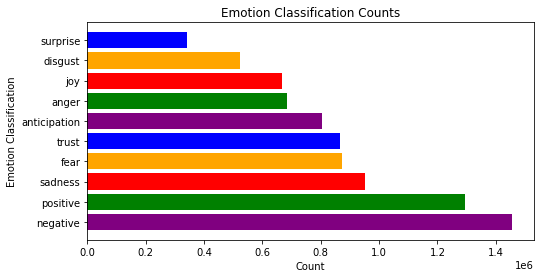

In [7]:
emotion_df = pd.DataFrame.from_dict(data, orient='index')
emotion_df = emotion_df.reset_index()
emotion_df = emotion_df.rename(columns={'index' : 'Emotion Classification' , 0: 'Emotion Count'})
emotion_df = emotion_df.sort_values(by=['Emotion Count'], ascending=False)
fig, ax = plt.subplots(figsize=(8, 4))
colors = ['purple', 'green', 'red', 'orange', 'blue']
for i, (emotion, count) in enumerate(zip(emotion_df['Emotion Classification'], emotion_df['Emotion Count'])):
    ax.barh(emotion, count, color=colors[i % len(colors)])

# set plot parameters
ax.set_title('Emotion Classification Counts')
ax.set_xlabel('Count')
ax.set_ylabel('Emotion Classification')

# display plot
plt.show()

In [8]:
# get for text classed as suicide
suicidelist = []
suicide_df = df[df['class']=='suicide']['lemmatized_processed_text'].reset_index(drop=True)
for i in range(len(suicide_df)):
    cleaned_text = re.sub(r"[\[\],']", "", suicide_df[i])
    suicidelist.append(cleaned_text)

str_list = ','.join(suicidelist)

# Create text object using NRCLex
text_object = NRCLex(str_list)
suicidedata = text_object.raw_emotion_scores
suicidedata

{'anger': 564562,
 'disgust': 419728,
 'fear': 737964,
 'negative': 1201747,
 'anticipation': 634369,
 'joy': 502007,
 'positive': 978255,
 'surprise': 258690,
 'trust': 650103,
 'sadness': 820438}

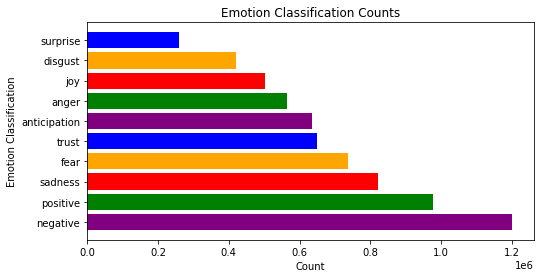

In [9]:
emotion_df = pd.DataFrame.from_dict(suicidedata, orient='index')
emotion_df = emotion_df.reset_index()
emotion_df = emotion_df.rename(columns={'index' : 'Emotion Classification' , 0: 'Emotion Count'})
emotion_df = emotion_df.sort_values(by=['Emotion Count'], ascending=False)
fig, ax = plt.subplots(figsize=(8, 4))
colors = ['purple', 'green', 'red', 'orange', 'blue']
for i, (emotion, count) in enumerate(zip(emotion_df['Emotion Classification'], emotion_df['Emotion Count'])):
    ax.barh(emotion, count, color=colors[i % len(colors)])

# set plot parameters
ax.set_title('Emotion Classification Counts')
ax.set_xlabel('Count')
ax.set_ylabel('Emotion Classification')

# display plot
plt.show()

In [10]:
# get for text classed as non-suicide
nonsuicidelist = []
nonsuicide_df = df[df['class']=='non-suicide']['lemmatized_processed_text'].reset_index(drop=True)
for i in range(len(nonsuicide_df)):
    cleaned_text = re.sub(r"[\[\],']", "", nonsuicide_df[i])
    nonsuicidelist.append(cleaned_text)

str_list = ','.join(nonsuicidelist)

# Create text object using NRCLex
text_object = NRCLex(str_list)
nonsuicidedata = text_object.raw_emotion_scores
nonsuicidedata

{'disgust': 104478,
 'negative': 255281,
 'anticipation': 170496,
 'joy': 165538,
 'positive': 315471,
 'surprise': 84401,
 'trust': 215272,
 'fear': 135272,
 'anger': 120484,
 'sadness': 131975}

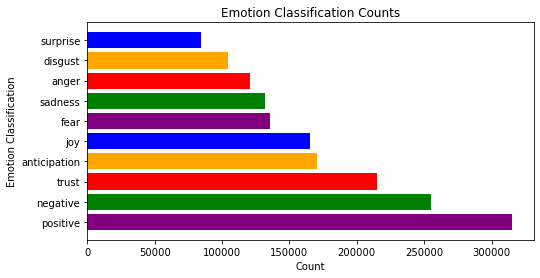

In [11]:
emotion_df = pd.DataFrame.from_dict(nonsuicidedata, orient='index')
emotion_df = emotion_df.reset_index()
emotion_df = emotion_df.rename(columns={'index' : 'Emotion Classification' , 0: 'Emotion Count'})
emotion_df = emotion_df.sort_values(by=['Emotion Count'], ascending=False)
fig, ax = plt.subplots(figsize=(8, 4))
colors = ['purple', 'green', 'red', 'orange', 'blue']
for i, (emotion, count) in enumerate(zip(emotion_df['Emotion Classification'], emotion_df['Emotion Count'])):
    ax.barh(emotion, count, color=colors[i % len(colors)])

# set plot parameters
ax.set_title('Emotion Classification Counts')
ax.set_xlabel('Count')
ax.set_ylabel('Emotion Classification')

# display plot
plt.show()

### Support Vector Machine (without FE)

In [12]:
# import relevant libraries
# Data processing
import pandas as pd
import numpy as np
# Encoding the data
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
# Modeling 
from sklearn.model_selection import train_test_split
from sklearn import svm 
# Hyperparameter tuning
# from sklearn.model_selection import StratifiedKFold, GridSearchCV, RandomizedSearchCV, cross_val_score
# from hyperopt import tpe, STATUS_OK, Trials, hp, fmin, STATUS_OK, space_eval
# Evaluation
from sklearn.metrics import confusion_matrix, accuracy_score
from matplotlib.colors import ListedColormap

In [13]:
# Split the X and Y Dataset into the Training set and Test set
X = df['clean_lemmatized_processed_text'].values
y = df['class'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [14]:
# Encoding variables for SVM to understand
Encoder = LabelEncoder()
y_train = Encoder.fit_transform(y_train)
y_test = Encoder.fit_transform(y_test)

In [15]:
# Word vectorisation
tfidf_vect = TfidfVectorizer(max_features=500)
tfidf_vect.fit(df['clean_lemmatized_processed_text'][:101])
X_train_tfidf = tfidf_vect.transform(X_train)
X_test_tfidf = tfidf_vect.transform(X_test)
print(tfidf_vect.vocabulary_)

{'wife': 477, 'left': 246, 'good': 185, 'twice': 452, 'much': 297, 'go': 181, 'back': 30, 'day': 90, 'ago': 9, 'began': 38, 'suicide': 419, 'talking': 428, 'keep': 231, 'want': 464, 'believe': 39, 'come': 71, 'know': 237, 'lot': 265, 'people': 326, 'get': 175, 'way': 468, 'happens': 200, 'really': 357, 'death': 94, 'still': 410, 'love': 266, 'deal': 92, 'getting': 176, 'feeling': 147, 'today': 441, 'may': 279, 'hope': 214, 'happen': 197, 'weird': 472, 'coming': 72, 'someone': 396, 'feel': 146, 'finally': 151, 'almost': 12, 'never': 301, 'hear': 206, 'bad': 31, 'year': 496, 'ever': 129, 'fucking': 166, 'need': 299, 'help': 208, 'cry': 82, 'hard': 202, 'afraid': 7, 'past': 324, 'thought': 437, 'fear': 145, 'anxiety': 19, 'close': 69, 'long': 259, 'scared': 369, 'family': 141, 'everyday': 131, 'lost': 264, 'thing': 433, 'done': 107, 'life': 250, 'like': 251, 'little': 255, 'time': 438, 'broke': 49, 'cut': 83, 'watching': 467, 'something': 397, 'made': 269, 'absolutely': 2, 'later': 242, '

In [16]:
print(X_train_tfidf)

  (0, 478)	0.32023050096986816
  (0, 464)	0.3790910941465745
  (0, 396)	0.23747160882524282
  (0, 326)	0.22100442266972095
  (0, 325)	0.3828351860996422
  (0, 181)	0.2173174018103915
  (0, 162)	0.23306490711610542
  (0, 141)	0.23747160882524282
  (0, 77)	0.5269098015692872
  (0, 20)	0.25762581584009414
  (1, 439)	0.3986118475812536
  (1, 399)	0.33757016148795094
  (1, 397)	0.26947955133797247
  (1, 354)	0.37327725883332513
  (1, 297)	0.21548678930134554
  (1, 260)	0.37327725883332513
  (1, 255)	0.27652847539464825
  (1, 251)	0.16832662332548884
  (1, 240)	0.2511938866467197
  (1, 214)	0.28419109209382654
  (1, 103)	0.28419109209382654
  (2, 497)	0.47174784912050804
  (2, 448)	0.39460335815631875
  (2, 281)	0.47174784912050804
  (2, 237)	0.2182971673337621
  :	:
  (174052, 21)	0.10188058285935991
  (174052, 5)	0.22431184633119203
  (174053, 496)	0.12414147808093903
  (174053, 471)	0.1692586046616407
  (174053, 433)	0.14059266033092832
  (174053, 424)	0.20105012471675732
  (174053, 315)	

In [ ]:
# Classifier - Algorithm - SVM
# fit the training dataset on the classifier
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(X_train_tfidf,y_train)
# predict the labels on validation dataset
y_pred = SVM.predict(X_test_tfidf)

In [ ]:
# Evaluation: Confusion Matrix
print("SVM Confusion Matrix -> ",confusion_matrix(y_test, y_pred))
# Evaluation: Accuracy Score
print("SVM Accuracy Score -> ",accuracy_score(y_pred, y_test)*100)